# Homework Week 3 - GWAS
_________________________________________

## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import statsmodels.api as sm
from qmplot import manhattanplot

## Problem 1

PCA was performed on the command line by `plink`. Load data from this and graph first two components.

In [2]:
pca = pd.read_csv('plink.eigenvec', sep=' ', header=None)
pca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1001,1001,-0.011308,-0.049610,-0.072624,-0.023323,0.043175,-0.048728,-0.127978,0.191397,...,0.096545,-0.153678,0.071009,-0.005070,-0.051850,-0.124780,-0.150898,-0.084354,-0.153340,-0.011041
1,1002,1002,-0.004055,-0.040953,-0.057589,-0.015546,0.035741,-0.043017,-0.087314,0.134233,...,0.064964,-0.118097,0.053080,0.000554,-0.034731,-0.093265,-0.106108,-0.051624,-0.102059,-0.012970
2,1003,1003,-0.013342,-0.038246,-0.050396,-0.014688,0.025219,-0.034451,-0.101281,0.150250,...,0.074239,-0.109622,0.049124,-0.008641,-0.045960,-0.083171,-0.108233,-0.071087,-0.123823,-0.002551
3,1004,1004,0.031194,0.049359,-0.030773,-0.061488,-0.124069,-0.107076,-0.095445,0.056787,...,-0.068472,0.190799,-0.043879,0.009271,0.065305,0.164456,0.126833,0.143317,-0.153845,0.224120
4,1005,1005,0.022213,0.030567,-0.021987,-0.051198,-0.093088,-0.068852,-0.054301,0.043353,...,-0.041638,0.139004,-0.015425,0.006282,0.049240,0.121767,0.100896,0.107745,-0.116885,0.157878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1172,1172,0.016668,-0.006058,-0.027844,0.063584,-0.087714,-0.108294,0.055890,-0.033144,...,0.069430,0.035812,0.056635,0.060608,0.039017,-0.026272,0.041630,0.008775,0.020674,-0.142412
172,1173,1173,0.022931,0.013074,-0.018204,0.066837,-0.099133,-0.098718,0.049424,-0.051004,...,0.085260,0.034335,0.055187,0.077056,0.049599,-0.013411,0.050939,0.003113,0.007984,-0.148249
173,1174,1174,0.018969,-0.026133,-0.017855,0.050315,0.025578,-0.090791,0.156150,-0.136859,...,-0.028247,-0.038486,0.060150,-0.099417,-0.073490,-0.059118,-0.049275,-0.129680,0.063625,0.088822
174,1175,1175,0.010821,-0.015036,-0.006342,0.026647,0.023291,-0.066618,0.110722,-0.088053,...,-0.020084,-0.035794,0.044745,-0.068716,-0.057270,-0.046110,-0.040691,-0.093583,0.050406,0.059395


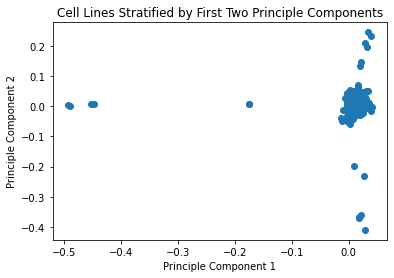

In [3]:
plt.scatter(pca[2], pca[3])
plt.title('Cell Lines Stratified by First Two Principle Components')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.savefig('graphs/PCA.jpg')
plt.show()

## Problem 2

Allele frequencies were obtained on the command line with `plink`. Load in data and graph.

In [4]:
freq = pd.read_csv('plink.frq', delim_whitespace=True)
freq

,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,rs9699599,G,A,0.11630,172
1,1,rs12138618,A,G,0.05747,174
2,1,rs3131969,G,A,0.30300,330
3,1,rs6672353,A,G,0.12210,172
4,1,rs13302982,G,A,0.27540,334
...,...,...,...,...,...,...
256891,22,rs762672,T,C,0.22160,334
256892,22,rs131711,C,G,0.06790,162
256893,22,rs2341011,C,T,0.48300,352
256894,22,rs9628187,T,C,0.22750,334


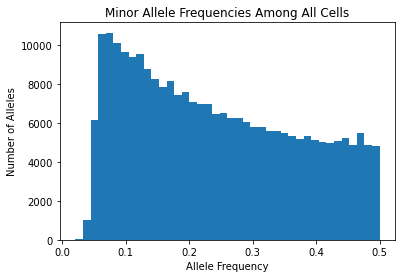

In [5]:
plt.hist(freq['MAF'], bins=40)
plt.title('Minor Allele Frequencies Among All Cells')
plt.xlabel('Allele Frequency')
plt.ylabel('Number of Alleles')
plt.savefig('graphs/allele_freqs.jpg')
plt.show()

## Problem 3

Association testing was done on the command line with `plink`. Load in data below.

In [6]:
cb_assoc = pd.read_csv('CB1908.qassoc', delim_whitespace=True)
gs_assoc = pd.read_csv('GS451.qassoc', delim_whitespace=True)

gs_assoc

,CHR,SNP,BP,NMISS,BETA,SE,R2,T,P
0,1,rs9699599,558185,85,1.3850,0.6800,0.047570,2.0360,0.04493
1,1,rs12138618,740098,86,-0.2962,0.9281,0.001211,-0.3191,0.75040
2,1,rs3131969,744045,164,0.2357,0.2673,0.004777,0.8818,0.37920
3,1,rs6672353,767376,85,0.2122,0.6867,0.001149,0.3090,0.75810
4,1,rs13302982,851671,166,0.2960,0.2660,0.007497,1.1130,0.26730
...,...,...,...,...,...,...,...,...,...
256891,22,rs762672,49411684,166,-0.4585,0.2921,0.014800,-1.5700,0.11840
256892,22,rs131711,49417023,80,-1.2380,0.7697,0.032110,-1.6090,0.11170
256893,22,rs2341011,49486501,175,-0.3644,0.2604,0.011200,-1.4000,0.16340
256894,22,rs9628187,49503532,166,0.0425,0.2990,0.000123,0.1421,0.88710


## Problem 4

Use association test data to graph. `statsmodels` was used for making QQ plots and `qmplot` was used for Manhattan plots.

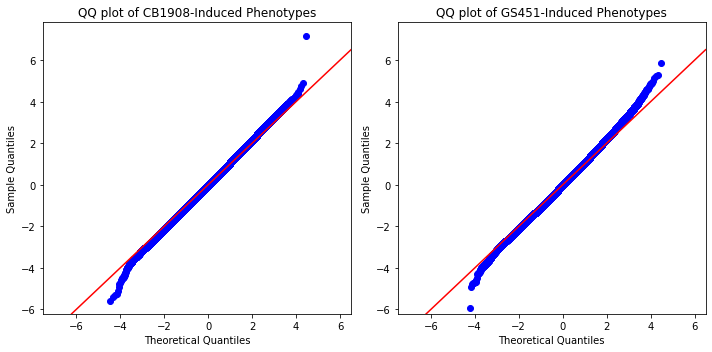

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sm.qqplot(cb_assoc['T'], line='45', ax=ax1)
ax1.set_title('QQ plot of CB1908-Induced Phenotypes')

sm.qqplot(gs_assoc['T'], line='45', ax=ax2)
ax2.set_title('QQ plot of GS451-Induced Phenotypes')

# These lines give the two graphs the same axes
# withotu cutting off any points
ax1.set_xlim(ax2.get_xlim())
ax2.set_ylim(ax1.set_ylim())

plt.tight_layout()
plt.savefig('graphs/qqplots.jpg')
plt.show()

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

manhattanplot(cb_assoc, chrom='CHR', pos='BP',
              pv='P', snp='SNP', sign_marker_p=1e-5, ax=ax,
              title='Manhattan Plot of SNP Association with CB1908-Induced Phenotypes',
              figname='graphs/CB1908_manhattan.jpg')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

manhattanplot(gs_assoc, chrom='CHR', pos='BP',
              pv='P', snp='SNP', sign_marker_p=1e-5, ax=ax,
              title='Manhattan Plot of SNP Association with GS451-Induced Phenotypes',
              figname='graphs/GS451_manhattan.jpg')

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

## Problem 5

I chose to look at the CB1908 phenotype. First load in genotype data, then find top associated SNP and retrieve those genotypes from the genotype file. Get the associated phenotypes and graph genotypes vs. phenotypes.

In [10]:
def read_vcf(path):
    '''
    This function is adapted from user dceoy on github
    https://gist.github.com/dceoy/99d976a2c01e7f0ba1c813778f9db744
    '''
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    df = pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

    return df

df = read_vcf('genotypes.vcf')
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,1001_1001,...,1167_1167,1168_1168,1169_1169,1170_1170,1171_1171,1172_1172,1173_1173,1174_1174,1175_1175,1176_1176
0,1,558185,rs9699599,A,G,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
1,1,740098,rs12138618,G,A,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
2,1,744045,rs3131969,A,G,.,.,PR,GT,0/1,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1,0/0
3,1,767376,rs6672353,G,A,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
4,1,851671,rs13302982,A,G,.,.,PR,GT,0/1,...,0/1,0/0,0/0,0/0,0/0,0/1,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256891,22,49411684,rs762672,C,T,.,.,PR,GT,0/1,...,0/1,0/1,0/1,0/0,0/1,0/0,0/1,0/1,0/0,0/1
256892,22,49417023,rs131711,G,C,.,.,PR,GT,0/0,...,./.,./.,./.,./.,./.,./.,./.,./.,./.,./.
256893,22,49486501,rs2341011,T,C,.,.,PR,GT,1/1,...,0/1,1/1,0/1,1/1,0/1,0/0,1/1,1/1,0/1,0/1
256894,22,49503532,rs9628187,C,T,.,.,PR,GT,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/1,0/1,0/1


In [11]:
top_cb = cb_assoc[cb_assoc['P'] == cb_assoc['P'].min()]
idx = top_cb.index.values[0]
genos = df[df['ID'] == top_cb.loc[idx, 'SNP']]
genos = genos.loc[:, '1001_1001':]
genos

,1001_1001,1002_1002,1003_1003,1004_1004,1005_1005,1006_1006,1007_1007,1008_1008,1009_1009,1010_1010,...,1167_1167,1168_1168,1169_1169,1170_1170,1171_1171,1172_1172,1173_1173,1174_1174,1175_1175,1176_1176
184404,0/1,0/1,./.,0/1,0/1,0/1,1/1,1/1,0/1,0/1,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [12]:
phenos = pd.read_csv('CB1908_IC50.txt', sep='\t')
phenos = phenos.dropna()
phenos

,FID,IID,CB1908_IC50
0,1001,1001,6.927466
1,1002,1002,11.887290
2,1003,1003,12.189243
3,1004,1004,11.953468
4,1005,1005,8.836499
...,...,...,...
171,1172,1172,5.877558
172,1173,1173,5.606679
173,1174,1174,7.102231
174,1175,1175,6.777682


In [13]:
# Build dictionary where genotypes are keys and a list of all
# phenotypes are the values
geno_idx = genos.index.values[0]
grouped = dict()
for idx, row in phenos.iterrows():
    sig = str(int(row['FID'])) + '_' + str(int(row['IID']))
    this_geno = genos.loc[geno_idx, sig]
    if this_geno in grouped.keys():
        grouped[this_geno].append(row['CB1908_IC50'])
    else:
        grouped[this_geno] = [row['CB1908_IC50']]

order = ['0/0', '0/1', '1/1', './.']
regrouped = {key: grouped[key] for key in order}
# Previous line adapted from https://stackoverflow.com/questions/5925731/reorder-dictionary-in-python-according-to-a-list-of-values/52044835

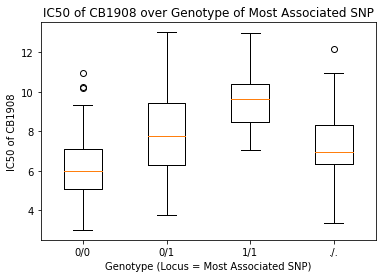

In [14]:
# https://stackoverflow.com/questions/47657651/boxplot-from-dictionary-with-different-length
box_labels, box_data = regrouped.keys(), regrouped.values()

plt.boxplot(box_data)
plt.xticks(range(1, len(box_labels) + 1), box_labels)
plt.title('IC50 of CB1908 over Genotype of Most Associated SNP')
plt.xlabel('Genotype (Locus = Most Associated SNP)')
plt.ylabel('IC50 of CB1908')
plt.savefig('graphs/boxplot.jpg')
plt.show()